# Management of Scientific Data

### Exam Project: 311 Service Requests in New York City

# Exam Project

## Structure

1. Data Management Plan
2. The Dataset: 311 Service Requests in New York City
3. Socrata Open Data API (SODA)
4. Data Quality Control
5. Data Analysis
6. Preserving and publishing

# Data Management Plan

## Creation of the Data Management plan

* The wizard by CLARIN-D (https://www.clarin-d.net/de/aufbereiten/datenmanagementplan-entwickeln) was used as a guide for which fields should be included
    * Not all fields were applicable since this is a small project
    * Some fields were added or re-ordered to better accomodate this project

# Data Management Plan

## Structure

* Project Information
* Research Data Information
* Documentation
* Storage and Backup
* Data sharing
* Licensing

## Project Information

**Project Supervisor**<br>
John Wigg

**Institution**<br>
Friedrich Schiller University Jena

**Context**<br>
Exam project for the course Management of Scientific Data

**Research Question**<br>
"What is the influence of national holidays on 311 Service Requests?"

## Research Data Information

### Produced data

##### Description

* Python Jupyter Notebook (.ipynb) used for this DMP as well as to access, analyze and visualise data
* PDF version of the notebook (.pdf)

##### Data formats

* `.ipynb` - Python Jupyter Notebooks
* `.pdf` - Portable Document Format

### Pre-existing data

##### Sources
* *311 Service Requests from 2010 to Present*
* provided by the City of New York Department of Technology and Telcommunications (DoITT)
* accessible at the NYC OpenData portal: https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9
* the data was accessed via the Socrata Open Data API (SODA)

##### License

* data provided under the *Open Data Law*
* terms of use: https://opendata.cityofnewyork.us/overview/#termsofuse

##### Reusability for other researchers

* data will stay freely available at https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

##### Creation of derived works

* FAQ states that there are no restrictions on how the data can be used: https://opendata.cityofnewyork.us/faq/
* terms of use are not clear about this

#### Relationship between produced and pre-existing data

* generated data are filtering, analysis and visualization scripts applied to the pre-existing data.

## Documentation

* use Jupyter (https://jupyter.org) or any other compatible software to access notebooks
* Python 3.7.4
* in the notebooks, the following Python libraries were used:
    * matplotlib 3.2.1, pandas 1.0.1, numpy 1.18.1, sodapy 2.1.0

## Storage and Backup

* generated data is kept in a public GitHub repository: https://github.com/john-wigg/mosd-exam
* data can be read by everyone, write access is restricted by GitHub's internal access management

## Data Sharing

* the complete generated project data is freely available at https://github.com/john-wigg/mosd-exam

## Licensing

* produced data is licensed under the MIT license, a very permissive license

# The Dataset

**311 Service Requests in New York City from 2010 to present**

* 311 provides access to *non-emergency* municipal services
* data provides information aboout
    * time/duration, reason, and resolution of complaints
    * who handled the complaint
    * and more...
* provided by the City of New York Department of Technology and Telcommunications (DoITT) through the NYC OpenData Portal

## Problem: Size of the Dataset
* the dataset is *very* large
    * ~ 12 GB as .csv download
    * data is updated daily
* loading whole dataset at once not a good idea


* Is there a way to filter relevant data without downloading the whole set?
    * **Socrata Open Data API (SODA)**

# Socrata Open Data API (SODA)
*The Socrata Open Data API (SODA) provides programmatic access to this dataset including the ability to filter, query, and aggregate data.*
![](media/soda_sidebar.PNG)

## sodapy

* `sodapy` provides Python bindings of the API.

In [1]:
from sodapy import Socrata

Each Socrata dataset is hosted on a domain and has an identifier:

In [2]:
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = 'erm2-nwe9'

Optionally, an application token can be generated by registering at https://opendata.socrata.com/.

This removes data limits:

In [3]:
with open("application.token", "r") as f:
    socrata_token = f.read()

Create a `client` that can be used to access the data:

In [4]:
client = Socrata(socrata_domain, socrata_token)
print("Domain: {domain:}\nSession: {session:}\nURI Prefix: {uri_prefix:}".format(**client.__dict__))

Domain: data.cityofnewyork.us
Session: <requests.sessions.Session object at 0x00000202C6C8AF08>
URI Prefix: https://


We can now use SoQL clauses (https://dev.socrata.com/docs/queries/) to query and filter the data "over the air".

**Example**: Calls that were created on January 10th 2015 between 12 AM and 2 PM:

In [5]:
import pandas as pd

In [6]:
results = client.get(socrata_dataset_identifier, where = "created_date between '2015-01-10T12:00:00' and '2015-01-10T14:00:00'")
df = pd.DataFrame.from_dict(results)

In [7]:
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,longitude,location,intersection_street_1,intersection_street_2,due_date,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,taxi_pick_up_location
0,29690137,2015-01-10T12:00:00.000,2015-01-10T12:00:00.000,DSNY,BCC - Brooklyn South,Derelict Vehicles,14 Derelict Vehicles,Street,11236,9211 AVENUE L,...,-73.8987949,"{'latitude': '40.6364239', 'longitude': '-73.8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29689451,2015-01-10T12:00:00.000,2015-01-12T10:13:00.000,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,11369,24-02 90 PLACE,...,-73.8789602,"{'latitude': '40.7655488', 'longitude': '-73.8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29691167,2015-01-10T12:00:03.000,2015-01-16T05:27:49.000,DOT,Department of Transportation,Broken Muni Meter,Coin or Card Did Not Register,Street,10462,NaN,...,-73.8648127,"{'latitude': '40.854443', 'longitude': '-73.86...",LYDIG AVENUE,WALLACE AVENUE,2015-01-30T12:00:03.000,NaN,NaN,NaN,NaN,NaN
3,29686604,2015-01-10T12:00:06.000,2015-01-10T15:50:40.000,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11226,531 EAST 22 STREET,...,-73.9569637,"{'latitude': '40.6393726', 'longitude': '-73.9...",NaN,NaN,2015-01-10T20:00:06.000,NaN,NaN,NaN,NaN,NaN
4,29685180,2015-01-10T12:00:30.000,2015-02-20T19:33:19.000,DOT,Department of Transportation,Highway Condition,Graffiti - Highway,Highway,NaN,NaN,...,NaN,NaN,NaN,NaN,2015-02-20T17:37:30.000,Cross Island Pkwy,South/Long Island Bound,Roadway,Northern Blvd (NY 25A) (Exit 31E) - Long Islan...,NaN


## Retreive metadata and data properties with SODA

Socrata also allows access to metadata:

In [8]:
md = client.get_metadata(socrata_dataset_identifier)
md.keys()

dict_keys(['id', 'name', 'attribution', 'averageRating', 'category', 'createdAt', 'description', 'displayType', 'downloadCount', 'hideFromCatalog', 'hideFromDataJson', 'indexUpdatedAt', 'newBackend', 'numberOfComments', 'oid', 'provenance', 'publicationAppendEnabled', 'publicationDate', 'publicationGroup', 'publicationStage', 'rowClass', 'rowIdentifierColumnId', 'rowsUpdatedAt', 'rowsUpdatedBy', 'tableId', 'totalTimesRated', 'viewCount', 'viewLastModified', 'viewType', 'approvals', 'columns', 'grants', 'metadata', 'owner', 'query', 'rights', 'tableAuthor', 'tags', 'flags'])

The metadata contains e.g. information about the columns:

In [9]:
print("Number of columns: ", len(md["columns"]))
print("----------------------------------------------------------")
for d in md["columns"][:5]:
    print(d["fieldName"], end="")
    if ("description" in d):
        print(": " + d["description"], end="")
    else:
        print(": NO DESCRIPTION")

Number of columns:  46
----------------------------------------------------------
unique_key: Unique identifier of a Service Request (SR) in the open data set
created_date: Date SR  was created
closed_date: Date SR was closed by responding agency
agency: Acronym of responding City Government Agency
agency_name: Full Agency name of responding City Government Agency

We can also use SODA to count the rows of the dataset without downloading it:

In [10]:
client.get(socrata_dataset_identifier, select="count(*)")

[{'count': '23501686'}]

# Data Qualitay Control

*NOTE: This data does not present a full picture of 311 calls or service requests, in part because of operational and system complexities associated with remote call taking necessitated by the unprecedented volume 311 is handling during the Covid-19 crisis. The City is working to address this issue.*
(Source: https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9)

→ we should avoid data from 2020

## Quality Control using SODA

* use the metadata to start with quality control
* e.g. find columns with missing descriptions

In [11]:
print("Columns with missing descriptions:")
for d in md["columns"]:
    if ("description" not in d):
        print("{} ({}) with data type {}.".format(d["fieldName"], d["name"], d["dataTypeName"]))

Columns with missing descriptions:
:@computed_region_efsh_h5xi (Zip Codes) with data type number.
:@computed_region_f5dn_yrer (Community Districts) with data type number.
:@computed_region_yeji_bk3q (Borough Boundaries) with data type number.
:@computed_region_92fq_4b7q (City Council Districts) with data type number.
:@computed_region_sbqj_enih (Police Precincts) with data type number.


* we can still retreive the fields `name` and `dataTypeName` to get a better idea
    * field name seems to indicate special or computed fields
* Looking at specific entries may give more clues.

→ **Fields do not seem relevant to the research question.**

Since the data set should contain only records since 2010, we can also check for invalid or missing creation dates:

In [12]:
results = client.get(socrata_dataset_identifier, where = "created_date < '2010-01-01T00:00:00' OR created_date IS NULL")
results

[]

In this case, all entries seem to have a valid date associated.

## Retreiving the relevant Data using SODA

* download only the interesting part of the data

***What is the influence of national holidays on 311 Service Requests?***<br>
**Example**: Independence Day 2019

* retreive data around July 4th 2019.

In [13]:
results = client.get(socrata_dataset_identifier, limit=500000, where = "created_date between '2019-06-20T0:00:00' and '2019-07-18T23:59:59'")
df = pd.DataFrame.from_dict(results)

In [14]:
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,cross_street_1,cross_street_2,intersection_street_1,...,longitude,location,taxi_pick_up_location,bridge_highway_segment,landmark,taxi_company_borough,bridge_highway_name,bridge_highway_direction,road_ramp,vehicle_type
0,43022702,2019-06-20T00:00:00.000,2019-06-24T11:20:00.000,DOT,Department of Transportation,Traffic Signal Condition,LED Lense,LINDEN BLVD,AVE D,LINDEN BLVD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43032740,2019-06-20T00:00:00.000,2019-07-15T00:00:00.000,DOHMH,Department of Health and Mental Hygiene,Standing Water,Sewer or Drain,PRINCE STREET,WEST HOUSTON STREET,NaN,...,-73.9983404,"{'latitude': '40.724938', 'longitude': '-73.99...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43021298,2019-06-20T00:00:00.000,2019-06-20T00:48:00.000,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,NaN,LEWIS AVENUE,...,-73.9361731,"{'latitude': '40.6886263', 'longitude': '-73.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43024836,2019-06-20T00:00:00.000,2019-07-09T00:00:00.000,DOHMH,Department of Health and Mental Hygiene,Standing Water,Other - Explain Below,FOSTER AVENUE,FARRAGUT ROAD,NaN,...,-73.9329166,"{'latitude': '40.6388286', 'longitude': '-73.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,43024837,2019-06-20T00:00:00.000,2019-07-11T00:00:00.000,DOHMH,Department of Health and Mental Hygiene,Standing Water,Other - Explain Below,37 AVENUE,ROOSEVELT AVENUE,NaN,...,-73.8851938,"{'latitude': '40.7493283', 'longitude': '-73.8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.shape

(192190, 41)

The dataset is still very large, but manageable!

## Quality Control using Pandas

* do "local" quality control on the smaller dataset

Plot a matrix highlighting all missing values (yellow are missing):

In [16]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6));
ax = plt.gca();
ax.imshow(np.array(df.isna()).transpose(), aspect='auto');
ax.set_yticks((range(0, len(df.columns))));
ax.set_yticklabels(df.columns);

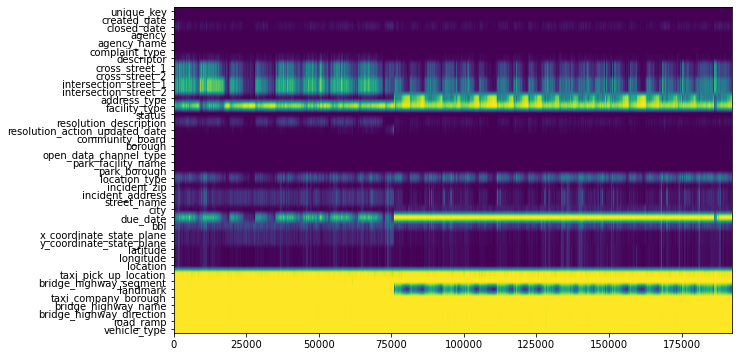

In [17]:
fig

* some `closed_date` seem to be missing
* it is hard to see but `descriptor` also has some missing values
* other fields may be specific to certain complaint types

* use pandas to gather which types of complaints where made how often

In [18]:
values = df["complaint_type"].value_counts()
len(values.keys())

196

We can see that there are 196 types of complaints hat occured in the time period.

* list the 20 most common complaint types:

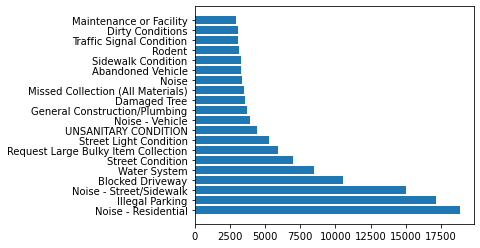

In [31]:
plt.figure(figsize=(5, 4))
plt.barh(values.keys()[:20], values[:20]);

* rare complaint types may reveal erroneous entries

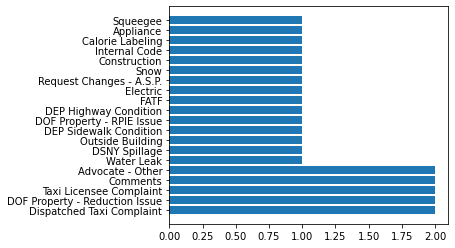

In [30]:
plt.figure(figsize=(5, 4))
plt.barh(values.keys()[-20:], values[-20:]);

* in this case, all entries seem to be reasonable
* clustering is the more proper way to do this

# Data Analysis

***What is the influence of national holidays on 311 Service Requests?***<br>
**Example**: Independence Day 2019

* Is there a spike in overall complaints?

* convert the `created_date` column to pandas dates first

In [21]:
df["created_date_format"] = pd.to_datetime(df["created_date"])

* resample and count the complaints per day

In [22]:
df_grouped = df.resample('D', on='created_date_format').count()

* plot the total number of complaints per day

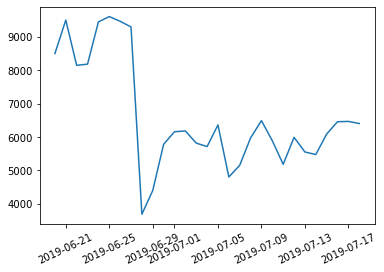

In [23]:
plt.plot(df_grouped.index, df_grouped["unique_key"]);
plt.xticks(rotation=25);

* there is a sharp decrease
* may be evident of a change in methodology as same was visible in matrix plot
* **but no evidence of a change of overall calls on July 4th**

* look at more specific complaint types
* noise complaints might be interesting

In [24]:
import re
df["complaint_type"].value_counts()[df["complaint_type"].value_counts().keys().str.contains("noise", flags=re.IGNORECASE)]

Noise - Residential         18874
Noise - Street/Sidewalk     14985
Noise - Vehicle              3947
Noise                        3375
Noise - Commercial           2736
Noise - Park                  659
Noise - Helicopter            146
Noise - House of Worship       64
Name: complaint_type, dtype: int64

* There is also a complaint type especially for illegal fireworks

In [25]:
df["complaint_type"].value_counts()[df["complaint_type"].value_counts().keys().str.contains("firework", flags=re.IGNORECASE)]

Illegal Fireworks    709
Name: complaint_type, dtype: int64

* plot the number of illegal firework complaints per day

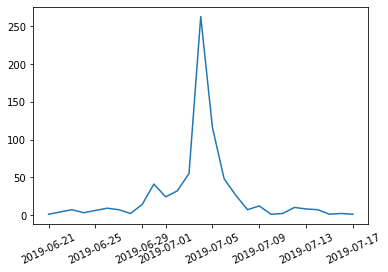

In [26]:
df_fireworks_grouped = df[df["complaint_type"] == "Illegal Fireworks"].resample('D', on='created_date_format').count()
plt.plot(df_fireworks_grouped.index, df_fireworks_grouped["unique_key"]);
plt.xticks(rotation=25);

* large uptick on July 4th
* almost no complants otherwise

* stackplot of all noise complaints by type

In [27]:
%%capture
keys = df["complaint_type"].value_counts()[df["complaint_type"].value_counts().keys().str.contains("noise", flags=re.IGNORECASE)].index
s = pd.Series(index=df_grouped.index, dtype='int')
noise_counts = []
for key in keys:
    noise_counts.append(s.add(df[df["complaint_type"] == key].resample('D', on='created_date_format').count()["unique_key"], fill_value=0))
fig = plt.figure(figsize=(7, 5))
ax = plt.gca()
ax.stackplot(df_grouped.index, noise_counts);
ax.tick_params(rotation=25);
ax.legend(keys);
ax.axvline(pd.to_datetime('2019-06-23'), color='black', linestyle='dashed');
ax.axvline(pd.to_datetime('2019-06-30'), color='black', linestyle='dashed');
ax.axvline(pd.to_datetime('2019-07-07'), color='black', linestyle='dashed');
ax.axvline(pd.to_datetime('2019-07-14'), color='black', linestyle='dashed');
ax.axvline(pd.to_datetime('2019-07-04'), color='black');

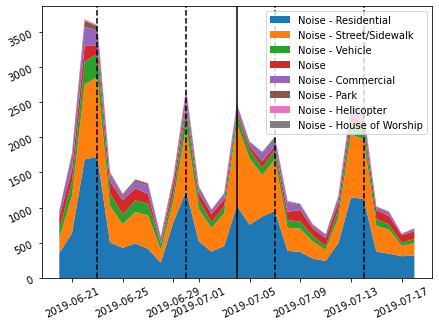

In [28]:
fig

* decode noise complaints by type

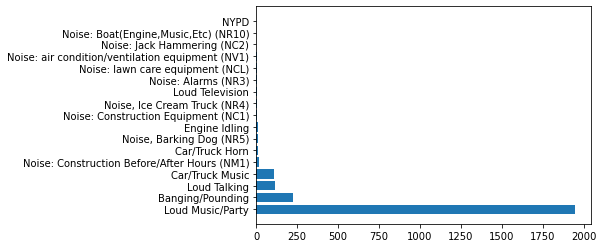

In [29]:
date_selector = (df["created_date_format"] > pd.to_datetime('2019-07-04T00:00:00')) & (df["created_date_format"] < pd.to_datetime('2019-07-05T00:00:00'))
counts = df[df["complaint_type"].str.contains("Noise") & date_selector]["descriptor"].value_counts()
plt.barh(counts.keys(), counts);

# Preserving and publishing

GitHub repo: https://github.com/john-wigg/mosd-exam

* the GitHub repository preserves past versions
* the data is decentralized
* the data can be accessed by everyone
* MIT License allows data to be freely used by other researchers
* for larger projects, publishing the results in a journal may lead to better visibility